In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
import locale
from locale import atof

In [2]:

df_World_Bank =pd.read_csv('C:/Users/Esme/Desktop/Springboard/Capstone_2/World_bank_USA/API_USA_DS2_en_csv_v2.csv', index_col = 0, header= 2, sep=",", engine = 'python', na_filter = False, thousands=',')

In [3]:
df_2016_unedited =pd.read_csv('C:/Users/Esme/Desktop/Springboard/Capstone_2/oesm16nat/oesm16nat/national_M2016_dl.csv', index_col = 0, header= 0, sep=",", engine = 'python', na_filter = False, thousands=',')
df_2015_unedited =pd.read_csv('C:/Users/Esme/Desktop/Springboard/Capstone_2/oesm15nat/oesm15nat/national_M2015_dl.csv', index_col = 0, header= 0, sep=",", engine = 'python', na_filter = False, thousands=',')
df_2014_unedited =pd.read_csv('C:/Users/Esme/Desktop/Springboard/Capstone_2/oesm14nat/oesm14nat/national_M2014_dl.csv', index_col = 0, header= 0, sep=",", engine = 'python', na_filter = False, thousands=',')
df_2013_unedited =pd.read_csv('C:/Users/Esme/Desktop/Springboard/Capstone_2/oesm13nat/oesm13nat/national_M2013_dl.csv', index_col = 0, header= 0, sep=",", engine = 'python', na_filter = False, thousands=',')
df_2012_unedited =pd.read_csv('C:/Users/Esme/Desktop/Springboard/Capstone_2/oesm12nat/oesm12nat/national_M2012_dl.csv', index_col = 0, header= 0, sep=",", engine = 'python', na_filter = False, thousands=',')
df_2011_unedited =pd.read_csv('C:/Users/Esme/Desktop/Springboard/Capstone_2/oesm11nat/national_M2011_dl.csv', index_col = 0, header= 0, sep=",", engine = 'python', na_filter = False, thousands=',')
df_2010_unedited =pd.read_csv('C:/Users/Esme/Desktop/Springboard/Capstone_2/oesm10nat/national_M2010_dl.csv', index_col = 0, header= 0, sep=",", engine = 'python', na_filter = False, thousands=',')
df_2009_unedited =pd.read_csv('C:/Users/Esme/Desktop/Springboard/Capstone_2/oesm09nat/national_dl.csv', index_col = 0, header= 0, sep=",", engine = 'python', na_filter = False, thousands=',')

df_2008_unedited =pd.read_csv('C:/Users/Esme/Desktop/Springboard/Capstone_2/oesm08nat/national__M2008_dl.csv', index_col = 0, header= 0, sep=",", engine = 'python', na_filter = False, thousands=',')
df_2007_unedited =pd.read_csv('C:/Users/Esme/Desktop/Springboard/Capstone_2/oesm07nat/national_May2007_dl.csv', index_col = 0, header= 0, sep=",", engine = 'python', na_filter = False, thousands=',')
df_2006_unedited =pd.read_csv('C:/Users/Esme/Desktop/Springboard/Capstone_2/oesm06nat/national_may2006_dl.csv', index_col = 0, header= 0, sep=",", engine = 'python', na_filter = False, thousands=',')
df_2005_unedited =pd.read_csv('C:/Users/Esme/Desktop/Springboard/Capstone_2/oesm05nat/national_may2005_dl.csv', index_col = 0, header= 0, sep=",", engine = 'python', na_filter = False, thousands=',')
df_2004_unedited =pd.read_csv('C:/Users/Esme/Desktop/Springboard/Capstone_2/oesm04nat/national_may2004_dl.csv', index_col = 0, header= 0, sep=",", engine = 'python', na_filter = False, thousands=',')
df_2003_unedited =pd.read_csv('C:/Users/Esme/Desktop/Springboard/Capstone_2/oesm03nat/national_may2003_dl.csv', index_col = 0, header= 0, sep=",", engine = 'python', na_filter = False, thousands=',')
df_2002_unedited =pd.read_csv('C:/Users/Esme/Desktop/Springboard/Capstone_2/oes02nat/national_2002_dl.csv', index_col = 0, header= 0, sep=",", engine = 'python', na_filter = False, thousands=',')


In [4]:
# function to clean up, set read-able column titles, and add year, so I can concatenate into one DF w/out loosing data


# function to clean up, set read-able column titles, and add year, so I can concatenate into one DF w/out loosing data
# function is allowing me stem and put all words in categories into lowercase, and translate needed numerical terms to numerical forms
# and create a employment percent column for each job type in the given year, before correlating all these DF into one doc

from nltk.stem import WordNetLemmatizer
from nltk.tokenize.moses import MosesDetokenizer
lemmatizer = nltk.stem.WordNetLemmatizer()
detokenizer = MosesDetokenizer()

def clean_labor_df(df, year):
    df= df.reset_index()
    df.columns= ['OCC_Code','Occupation_title','OCC_group', 'total_employment', 'Employment_RSE', 'mean_hourly_wage','mean_annual_wage', 'mean_wage_RSE', 'hourly_10th_percentile_wage', 'hourly_25th_percentile_wage', 'hourly_median_wage', 'hourly 75_percentile_wage', 'hourly_90th_percentile_wage', 'annual_10th_percentile_wage', 'annual_25th_percentile_wage', 'annual_median_percentile_wage', 'annual_75th_percentile_wage', 'annual_90th_percentile_wage', 'Annual:T/F', 'Wage:T/F' ]
    df['Year']= year
    df1= df.drop(['Annual:T/F', 'Wage:T/F'], axis=1)
    df2=df1.replace('**', np.nan)
    df3= df2.replace('#', np.nan)
    df3['total_employment']=pd.to_numeric(df3['total_employment'], errors='coerce', downcast='float')
    df3['mean_hourly_wage']= pd.to_numeric(df3['mean_hourly_wage'], errors='coerce', downcast='float')
    df3['mean_annual_wage']= pd.to_numeric(df3['mean_annual_wage'], errors='coerce', downcast='float')
    df3['hourly_median_wage']= pd.to_numeric(df3['hourly_median_wage'], errors='coerce', downcast='float')
    total_employ= df3['total_employment'][df3['Occupation_title']=='All Occupations']
    df3['job_employ_percent']= df3['total_employment']/ total_employ[0]
    # stem and tokenize jobt titles
    df3['Occupation_title'] = df3['Occupation_title'].str.lower()
    df3['Occupation_title'] = df3['Occupation_title'].apply(
        lambda x : x.split(" ")).apply(lambda x : [lemmatizer.lemmatize(y) for y in x])
    # detokenize titles
    df3['Occupation_title'] = df3['Occupation_title'].apply(lambda x :[detokenizer.detokenize(x, return_str=True)])
    df3['Occupation_title'] = df3['Occupation_title'].astype(str)
    df3['Occupation_title'] = df3['Occupation_title'].map(lambda x: x.lstrip("(){}[] ' ").
                                                   rstrip("''(){}[] "))
    
    
    return df3

In [5]:
# second function for  the multivalue index in 2006 data
def clean_labor_df2(df, year):
    df.columns= df.columns.get_level_values(0)
    df= df.reset_index()
    df.columns= ['OCC_Code','Occupation_title','OCC_group', 'total_employment', 'Employment_RSE', 'mean_hourly_wage','mean_annual_wage', 'mean_wage_RSE', 'hourly_10th_percentile_wage', 'hourly_25th_percentile_wage', 'hourly_median_wage', 'hourly 75_percentile_wage', 'hourly_90th_percentile_wage', 'annual_10th_percentile_wage', 'annual_25th_percentile_wage', 'annual_median_percentile_wage', 'annual_75th_percentile_wage', 'annual_90th_percentile_wage', 'Annual:T/F', 'Wage:T/F' ]
    df['Year']= year
    df1= df.drop(['Annual:T/F', 'Wage:T/F'], axis=1)
    df2=df1.replace('**', np.nan)
    df3= df2.replace('#', np.nan)
    df3['total_employment']=pd.to_numeric(df3['total_employment'], errors='coerce', downcast='float')
    df3['mean_hourly_wage']= pd.to_numeric(df3['mean_hourly_wage'], errors='coerce', downcast='float')
    df3['mean_annual_wage']= pd.to_numeric(df3['mean_annual_wage'], errors='coerce', downcast='float')
    df3['hourly_median_wage']= pd.to_numeric(df3['hourly_median_wage'], errors='coerce', downcast='float')
    total_employ= df3['total_employment'][df3['Occupation_title']=='All Occupations']
    df3['job_employ_percent']= df3['total_employment']/ total_employ[0]
    # stem and tokenize jobt titles
    df3['Occupation_title'] = df3['Occupation_title'].str.lower()
    df3['Occupation_title'] = df3['Occupation_title'].apply(
        lambda x : x.split(" ")).apply(lambda x : [lemmatizer.lemmatize(y) for y in x])
    # detokenize titles
    df3['Occupation_title'] = df3['Occupation_title'].apply(lambda x :[detokenizer.detokenize(x, return_str=True)])
    df3['Occupation_title'] = df3['Occupation_title'].astype(str)
    df3['Occupation_title'] = df3['Occupation_title'].map(lambda x: x.lstrip("(){}[] ' ").
                                                   rstrip("''(){}[] "))
    

    return df3

In [6]:
# second function for  the multivalue index and missing data in 2003 and 2002
def clean_labor_df3(df, year):

    df= df.reset_index()
    df.columns= ['OCC_Code','Occupation_title','OCC_group', 'total_employment', 'Employment_RSE', 'mean_hourly_wage','mean_annual_wage', 'mean_wage_RSE', 'hourly_10th_percentile_wage', 'hourly_25th_percentile_wage', 'hourly_median_wage', 'hourly 75_percentile_wage', 'hourly_90th_percentile_wage', 'annual_10th_percentile_wage', 'annual_25th_percentile_wage', 'annual_median_percentile_wage', 'annual_75th_percentile_wage', 'annual_90th_percentile_wage', 'Annual:T/F']
    df['Year']= year
    df1= df.drop(['Annual:T/F'], axis=1)
    df2=df1.replace('**', np.nan)
    df3= df2.replace('#', np.nan)
    df3['total_employment']=pd.to_numeric(df3['total_employment'], errors='coerce', downcast='float')
    df3['mean_hourly_wage']= pd.to_numeric(df3['mean_hourly_wage'], errors='coerce', downcast='float')
    df3['mean_annual_wage']= pd.to_numeric(df3['mean_annual_wage'], errors='coerce', downcast='float')
    df3['hourly_median_wage']= pd.to_numeric(df3['hourly_median_wage'], errors='coerce', downcast='float')
    total_employ= df3['total_employment'][df3['Occupation_title']=='All Occupations']
    df3['job_employ_percent']= df3['total_employment']/ total_employ[0]
        # stem and tokenize jobt titles
    df3['Occupation_title'] = df3['Occupation_title'].str.lower()
    df3['Occupation_title'] = df3['Occupation_title'].apply(
        lambda x : x.split(" ")).apply(lambda x : [lemmatizer.lemmatize(y) for y in x])
    # detokenize titles
    df3['Occupation_title'] = df3['Occupation_title'].apply(lambda x :[detokenizer.detokenize(x, return_str=True)])
    df3['Occupation_title'] = df3['Occupation_title'].astype(str)
    df3['Occupation_title'] = df3['Occupation_title'].map(lambda x: x.lstrip("(){}[] ' ").
                                                   rstrip("''(){}[] "))
    

    return df3

In [7]:
df_2016= clean_labor_df(df_2016_unedited, '2016')
df_2015= clean_labor_df(df_2015_unedited, '2015')
df_2014= clean_labor_df(df_2014_unedited, '2014')
df_2013= clean_labor_df(df_2013_unedited, '2013')
df_2012= clean_labor_df(df_2012_unedited, '2012')
df_2011= clean_labor_df(df_2011_unedited, '2011')
df_2010= clean_labor_df(df_2010_unedited, '2010')
df_2009= clean_labor_df(df_2009_unedited, '2009')
df_2008= clean_labor_df(df_2008_unedited, '2008')
df_2007= clean_labor_df(df_2007_unedited, '2007')
df_2006= clean_labor_df2(df_2006_unedited, '2006')
df_2005= clean_labor_df(df_2005_unedited, '2005')
df_2004= clean_labor_df(df_2004_unedited, '2004')
df_2003= clean_labor_df3(df_2003_unedited, '2003')
df_2002= clean_labor_df3(df_2002_unedited, '2002')

In [9]:
all_list= (df_2002, df_2003, df_2004, df_2005, df_2006, df_2007, df_2008, df_2009, df_2010, df_2011, df_2012, df_2013, df_2014, df_2015, df_2016)
df_all_labor= pd.concat(all_list)

Note for reference from Data source: 
occ_group: Shows the SOC occupation level: "total"=total of all occupations; "major"=SOC major group; "minor"=SOC minor group; "broad"=SOC broad occupation; "detailed"=SOC detailed occupation

# Incorperate GDP data
isolate GDP from the world bank data by year, switch column and row, and join to existing df along year listing as GDP column

In [11]:
df_WB_GDP_unedited= df_World_Bank.loc[df_World_Bank['Indicator Name'] == 'GDP per capita (current US$)']
df_WB_GDP_growth_unedited= df_World_Bank.loc[df_World_Bank['Indicator Name'] == 'GDP growth (annual %)']
df_WB_GDP_worker_unedited= df_World_Bank.loc[df_World_Bank['Indicator Name'] == 'GDP per person employed (constant 2011 PPP $)']


df_WB_selfemployed_per_unedited= df_World_Bank.loc[df_World_Bank['Indicator Name'] == 'Self-employed, total (% of total employment) (modeled ILO estimate)']
df_WB_maleselfemployed_per_unedited= df_World_Bank.loc[df_World_Bank['Indicator Name'] == 'Self-employed, male (% of male employment) (modeled ILO estimate)']
df_WB_femaleselfemployed_per_unedited= df_World_Bank.loc[df_World_Bank['Indicator Name'] == 'Self-employed, female (% of female employment) (modeled ILO estimate)']

df_WB_unemploymentper_unedited= df_World_Bank.loc[df_World_Bank['Indicator Name'] == 'Unemployment, total (% of total labor force) (national estimate)']
df_WB_male_unemploymentper_unedited= df_World_Bank.loc[df_World_Bank['Indicator Name'] == 'Unemployment, male (% of male labor force) (national estimate)']
df_WB_female_unemploymentper_unedited= df_World_Bank.loc[df_World_Bank['Indicator Name'] == 'Unemployment, female (% of female labor force) (national estimate)']


In [12]:
# clean and transpose the DF so years are rows then concat into one DF
def clean_WB(df):
    df.columns= df.columns.get_level_values(0)
    df1= df.reset_index()
    df2= df1.drop(['Indicator Code', 'Country Code', 'Country Name'], axis= 1)
    df3= df2.transpose()
    return df3    

In [13]:
df_WB1= clean_WB(df_WB_GDP_unedited)
df_WB2= clean_WB(df_WB_GDP_growth_unedited)
df_WB3= clean_WB(df_WB_GDP_worker_unedited)

df_WB4= clean_WB(df_WB_selfemployed_per_unedited)
df_WB5= clean_WB(df_WB_maleselfemployed_per_unedited)
df_WB6=clean_WB(df_WB_femaleselfemployed_per_unedited)

df_WB7=clean_WB(df_WB_unemploymentper_unedited)
df_WB8=clean_WB(df_WB_male_unemploymentper_unedited)
df_WB9=clean_WB(df_WB_female_unemploymentper_unedited)

In [14]:
all_df= [df_WB1, df_WB2, df_WB3, df_WB4, df_WB5, df_WB6, df_WB7, df_WB8, df_WB9]

df_WB_GDP_plus= pd.concat(all_df, axis=1, join='inner')
df_WB_GDP_plus= df_WB_GDP_plus.drop(df_WB_GDP_plus.index[0])
df_WB_GDP_plus= df_WB_GDP_plus.reset_index()
df_WB_GDP_plus= df_WB_GDP_plus.drop(df_WB_GDP_plus.index[::58])
df_WB_GDP_plus.columns= ('Year', 'GDP per capita (current US$)','GDP growth (annual %)', 'GDP per person employed (constant 2011 PPP$)', 
                        '% of self-employed workers(all)', '% of self-employed male workers(% of all male workers)', 
                         '% of self-employed female workers (% of all female workers)', 'Unemployment, total (% of total labor force)', 
                        'Unemployment, male (% of male labor force)', 'Unemployment, female (% of female labor force)')
# only interestd in data from 2002 on
df_WB_GDP_recent= df_WB_GDP_plus.drop(df_WB_GDP_plus.index[0:42])
df_WB_GDP_recent

,Year,GDP per capita (current US$),GDP growth (annual %),GDP per person employed (constant 2011 PPP$),% of self-employed workers(all),% of self-employed male workers(% of all male workers),% of self-employed female workers (% of all female workers),"Unemployment, total (% of total labor force)","Unemployment, male (% of male labor force)","Unemployment, female (% of female labor force)"
43,2003,39677.1983481058,2.80677595648093,97912,11.3000001907349,13.8000001907349,8.30000019073486,6,6.30000019073486,5.69999980926514
44,2004,41921.8097617892,3.78574284969444,100435,11.1999998092651,13.8000001907349,8.30000019073486,5.5,5.59999990463257,5.40000009536743
45,2005,44307.9205848603,3.34521606334877,102124,11.1000003814697,13.6000003814697,8,5.09999990463257,5.09999990463257,5.09999990463257
46,2006,46437.0671173065,2.666625826122,103062,10.8999996185303,13.3999996185303,8,4.59999990463257,4.59999990463257,4.59999990463257
47,2007,48061.5376613353,1.77857023965289,104015,10.6999998092651,13.1000003814697,7.80000019073486,4.59999990463257,4.69999980926514,4.5
48,2008,48401.4273403899,-0.291621458693953,103863,10.3999996185303,12.8999996185303,7.5,5.80000019073486,6.09999990463257,5.40000009536743
49,2009,47001.5553496818,-2.77552957416808,104800,10.6000003814697,13.1000003814697,7.69999980926514,9.19999980926514,10.3000001907349,8.10000038146973
50,2010,48373.8788155779,2.53192061616315,107956,10.6999998092651,13.1999998092651,7.80000019073486,9.60000038146973,10.5,8.60000038146973
51,2011,49790.6654782305,1.60145467247139,108733,10.3999996185303,12.8000001907349,7.59999990463257,9,9.39999961853027,8.5
52,2012,51450.1222950581,2.22403085385714,109261,10.3999996185303,12.6000003814697,7.80000019073486,8.10000038146973,8.19999980926514,7.90000009536743


In [15]:
df_WB_GDP_recent.head(1)

,Year,GDP per capita (current US$),GDP growth (annual %),GDP per person employed (constant 2011 PPP$),% of self-employed workers(all),% of self-employed male workers(% of all male workers),% of self-employed female workers (% of all female workers),"Unemployment, total (% of total labor force)","Unemployment, male (% of male labor force)","Unemployment, female (% of female labor force)"
43,2003,39677.1983481058,2.80677595648093,97912,11.3000001907349,13.8000001907349,8.30000019073486,6,6.30000019073486,5.69999980926514


In [16]:
df_WB_GDP_recent['GDP per capita (current US$)']= pd.to_numeric(df_WB_GDP_recent['GDP per capita (current US$)'], errors='coerce', downcast='float')
df_WB_GDP_recent['GDP growth (annual %)']= pd.to_numeric(df_WB_GDP_recent['GDP growth (annual %)'], errors='coerce')
df_WB_GDP_recent['GDP per person employed (constant 2011 PPP$)']= pd.to_numeric(df_WB_GDP_recent['GDP per person employed (constant 2011 PPP$)'], errors='coerce')

df_WB_GDP_recent['% of self-employed workers(all)']= pd.to_numeric(df_WB_GDP_recent['% of self-employed workers(all)'], errors='coerce')
df_WB_GDP_recent['% of self-employed male workers(% of all male workers)']= pd.to_numeric(df_WB_GDP_recent['% of self-employed male workers(% of all male workers)'], errors='coerce')
df_WB_GDP_recent['% of self-employed female workers (% of all female workers)']= pd.to_numeric(df_WB_GDP_recent['% of self-employed female workers (% of all female workers)'], errors='coerce')

df_WB_GDP_recent['Unemployment, total (% of total labor force)']= pd.to_numeric(df_WB_GDP_recent['Unemployment, total (% of total labor force)'], errors='coerce')
df_WB_GDP_recent['Unemployment, male (% of male labor force)']= pd.to_numeric(df_WB_GDP_recent['Unemployment, male (% of male labor force)'], errors='coerce')
df_WB_GDP_recent['Unemployment, male (% of female labor force)']= pd.to_numeric(df_WB_GDP_recent['Unemployment, female (% of female labor force)'], errors='coerce')
df_WB_GDP_recent.head(3)

,Year,GDP per capita (current US$),GDP growth (annual %),GDP per person employed (constant 2011 PPP$),% of self-employed workers(all),% of self-employed male workers(% of all male workers),% of self-employed female workers (% of all female workers),"Unemployment, total (% of total labor force)","Unemployment, male (% of male labor force)","Unemployment, female (% of female labor force)","Unemployment, male (% of female labor force)"
43,2003,39677.199219,2.806776,97912,11.3,13.8,8.3,6.0,6.3,5.69999980926514,5.7
44,2004,41921.808594,3.785743,100435,11.2,13.8,8.3,5.5,5.6,5.40000009536743,5.4
45,2005,44307.921875,3.345216,102124,11.1,13.6,8.0,5.1,5.1,5.09999990463257,5.1


In [17]:
df_GDP_salary= pd.merge(df_WB_GDP_recent, df_all_labor, left_on= 'Year', right_on='Year')

In [20]:
df_GDP_salary.head()

,Year,GDP per capita (current US$),GDP growth (annual %),GDP per person employed (constant 2011 PPP$),% of self-employed workers(all),% of self-employed male workers(% of all male workers),% of self-employed female workers (% of all female workers),"Unemployment, total (% of total labor force)","Unemployment, male (% of male labor force)","Unemployment, female (% of female labor force)",...,hourly_25th_percentile_wage,hourly_median_wage,hourly 75_percentile_wage,hourly_90th_percentile_wage,annual_10th_percentile_wage,annual_25th_percentile_wage,annual_median_percentile_wage,annual_75th_percentile_wage,annual_90th_percentile_wage,job_employ_percent
0,2003,39677.199219,2.806776,97912,11.3,13.8,8.3,6.0,6.3,5.69999980926514,...,9.08,13.530000,21.17,31.97,14640,18880,28140,44040,66500,1.000000
1,2003,39677.199219,2.806776,97912,11.3,13.8,8.3,6.0,6.3,5.69999980926514,...,23.14,34.070000,49.39,NaN,33590,48140,70870,102730,NaN,0.052156
2,2003,39677.199219,2.806776,97912,11.3,13.8,8.3,6.0,6.3,5.69999980926514,...,41.64,64.779999,NaN,NaN,55720,86620,134740,NaN,NaN,0.003056
3,2003,39677.199219,2.806776,97912,11.3,13.8,8.3,6.0,6.3,5.69999980926514,...,23.48,35.000000,54.20,NaN,34850,48840,72800,112730,NaN,0.014832
4,2003,39677.199219,2.806776,97912,11.3,13.8,8.3,6.0,6.3,5.69999980926514,...,6.42,7.900000,19.51,34.92,12220,13340,16440,40580,72630,0.000512


# deep dive ideas: 
"office and administrative support occupation"

## "food preparation and serving related occupation" 
## "production occupation"
## "transportation and paterial moving occupation"
"healthcare practitioner and technical occupation"
 ## "management occupation"
## "construction and extraction occupation" --
"personal care and service occupation"
"computer and mathematical occupation"
"sale and related"
"farming, fishing & forestry"
"installation, maintenanceand repair"

Theory for categorizing/isolating futher- the full list (by initial index) is sorted by major cateegories and the corresponding detailed categories DIRECTLY BELOW that major category. 

Therefore, if I identify all the major category groups I can look at the Labor Bureru defined major/detailed groups within that cateogory for the "deep dive". 

I am using the names of the major categories isolated from the first group to identify and categorize the major and detailed groups

In [21]:
# isolating the total list by only the major job types
df_G_s_major= df_GDP_salary.loc[df_GDP_salary['OCC_group']== 'major' ]
df_G_s_broad= df_GDP_salary.loc[df_GDP_salary['OCC_group']== 'broad' ]
df_G_s_detailed= df_GDP_salary.loc[df_GDP_salary['OCC_group']== 'detailed' ]

In [22]:
df_all_index= df_GDP_salary[['Occupation_title','mean_annual_wage', 'job_employ_percent', 'total_employment', 
                              'Year', 'GDP per person employed (constant 2011 PPP$)', 'GDP per capita (current US$)',
                             'GDP growth (annual %)', 'Unemployment, total (% of total labor force)', 'OCC_group']].copy()

In [23]:
df_all_index["mean_employment"]= df_all_index['mean_annual_wage']/df_all_index['total_employment']
df_all_index["mean_percent"]= df_all_index['mean_annual_wage']/(df_all_index['job_employ_percent'])
df_all_index["percent_mean"]=df_all_index['job_employ_percent']/df_all_index['mean_annual_wage']
df_all_index["employment_mean"]=df_all_index['total_employment']/df_all_index['mean_annual_wage']
df_all_indexs= df_all_index.copy()
df_all_indexs['Occupation_title'] = df_all_indexs['Occupation_title'].map(lambda x: x.rstrip('occupation'))

In [26]:

manag=df_all_index.loc[df_all_index['Occupation_title']=='management occupation']
production=df_all_index.loc[df_all_index['Occupation_title']=='production occupation']
trans_material=df_all_index.loc[df_all_index['Occupation_title']=='transportation and material moving occupation']
food_prep=df_all_index.loc[df_all_index['Occupation_title']=='food preparation and serving related occupation']
cons=df_all_index.loc[df_all_index['Occupation_title']=='construction and extraction occupation']
off_admin=df_all_index.loc[df_all_index['Occupation_title']=='office and administrative support occupation']


In [49]:
df_manag=df_G_s_major.loc[df_G_s_major['Occupation_title']=='management occupation']
df_prod=df_G_s_major.loc[df_G_s_major['Occupation_title']=='production occupation']
df_trans_material=df_G_s_major.loc[df_G_s_major['Occupation_title']=='transportation and material moving occupation']
df_food_prep=df_G_s_major.loc[df_G_s_major['Occupation_title']=='food preparation and serving related occupation']
df_cons=df_G_s_major.loc[df_G_s_major['Occupation_title']=='construction and extraction occupation']
df_off_admin=df_G_s_major.loc[df_G_s_major['Occupation_title']=='office and administrative support occupation']

df_deep_dive= pd.concat((df_manag, df_prod, df_trans_material, df_food_prep, df_cons, df_off_admin))


In [83]:
df_deep_dive['mean_employment']= df_deep_dive.mean_annual_wage/df_deep_dive.total_employment

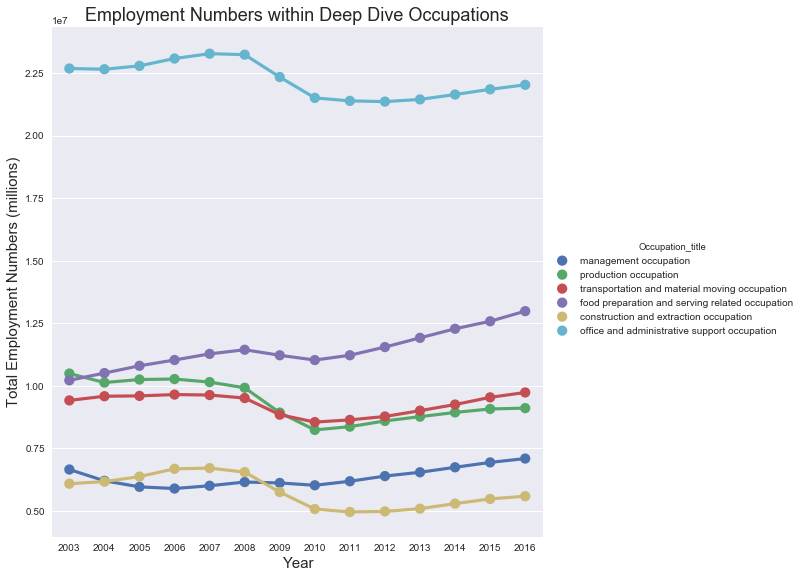

In [125]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 15

sns.factorplot(x='Year', y='total_employment',hue='Occupation_title' ,data=df_deep_dive, size=8 , aspect=1)
plt.xlabel('Year', fontsize= 15)
plt.ylabel('Total Employment Numbers (millions)', fontsize=15 )
plt.title( 'Employment Numbers within Deep Dive Occupations', fontsize= 18)

plt.show()

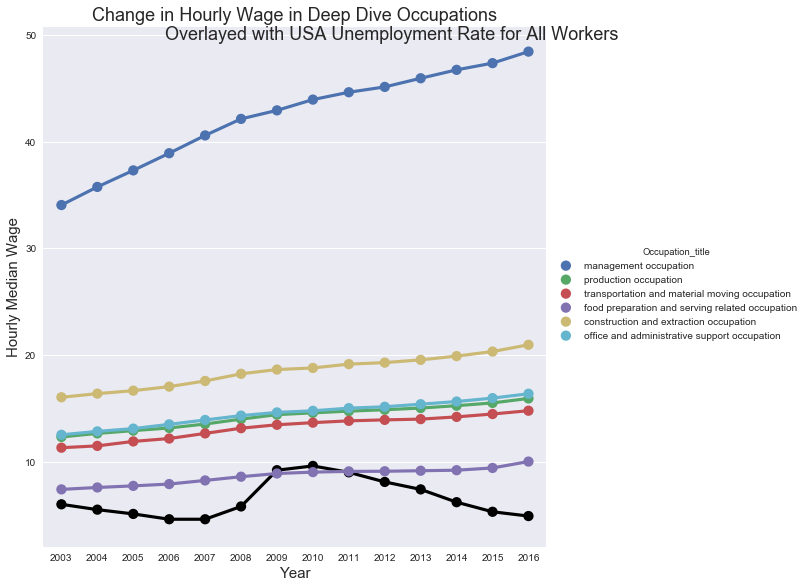

In [122]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 15

Y=df_G_s_major['Unemployment, total (% of total labor force)']

sns.factorplot(x='Year', y='hourly_median_wage',hue='Occupation_title' ,data=df_deep_dive, size=8 , aspect=1)

sns.pointplot(x='Year', y=Y, data=df_G_s_major, color='black', alpha=0.5)

plt.xlabel('Year', fontsize= 15)
plt.ylabel('Hourly Median Wage', fontsize=15 )
plt.title('Change in Hourly Wage in Deep Dive Occupations', fontsize= 18)
plt.suptitle('Overlayed with USA Unemployment Rate for All Workers', fontsize= 18)

plt.show()

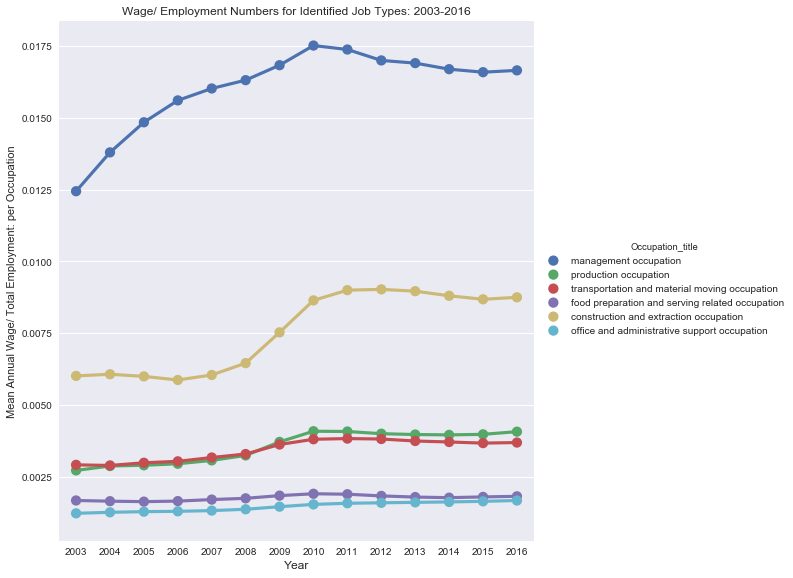

In [114]:
sns.factorplot(x='Year', y='mean_employment',hue='Occupation_title', data=df_deep_dive, size=8 , aspect=1)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Mean Annual Wage/ Total Employment: per Occupation')
plt.title('Wage/ Employment Numbers for Identified Job Types: 2003-2016')
plt.show()